In [14]:
import xgboost as xgb
import pandas as pd # analysis
import numpy as np # calculation
from pandas import Series, DataFrame
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import ensemble

In [20]:
# read data set
data = pd.read_csv('data.csv') # read training data
data = data.iloc[:,1:]
test_data = pd.read_csv('test.csv')
test_data = test_data.iloc[:,1:]

test_data.head()

,日收益率_Dret,滞后一期收益,市盈率_PE,市净率_PB,市销率_PS,每股收益(摊薄)(元/股)_EPS,净资产收益率(摊薄)_ROE,每股营业利润(元/股)_OpPrfPS,每股净资产(元/股)_NAPS,每股营业收入_IncomePS
0,NaN,0.0067,38.99,5.19,1.75,1.22,17.8579,1.96,6.82,23.53
1,NaN,0.0114,9.09,2.38,2.06,1.89,33.4965,2.59,5.65,5.63
2,NaN,0.0059,30.42,1.96,0.74,0.48,8.5971,0.66,5.64,13.19
3,NaN,0.0357,137.55,2.90,0.52,0.04,2.0229,0.07,2.05,7.43
4,NaN,0.0177,40.90,6.55,10.00,0.63,12.3956,0.74,5.10,2.75


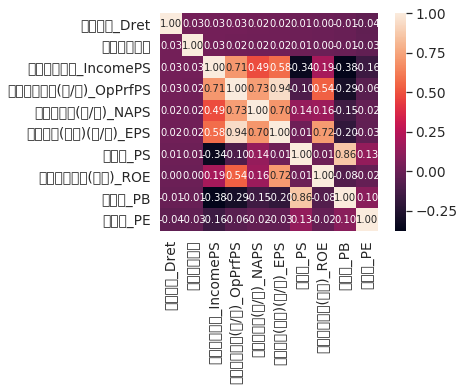

In [16]:
# pick features that are most relevant
import seaborn as sns
k = 10
cols = data.corr().nlargest(k, '日收益率_Dret')['日收益率_Dret'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar = True, annot=True, square=True, fmt='.2f',annot_kws={'size':10}, yticklabels=cols.values, xticklabels=cols.values)


In [21]:
# data = data[['日收益率_Dret', '滞后一期收益', '市盈率_PE', '市净率_PB', '市销率_PS', '每股收益(摊薄)(元/股)_EPS', '每股营业利润(元/股)_OpPrfPS', '每股净资产(元/股)_NAPS', '每股营业收入_IncomePS']]

# test_data = test_data[['日收益率_Dret', '滞后一期收益', '市盈率_PE', '市净率_PB', '市销率_PS', '每股收益(摊薄)(元/股)_EPS', '每股营业利润(元/股)_OpPrfPS', '每股净资产(元/股)_NAPS', '每股营业收入_IncomePS']]
# data.head()

In [28]:
# split into training set and test set
# data.rename("")
X_train = data.iloc[:, 1:]
y_train = data.iloc[:, 0]
X_test = test_data.iloc[:, 1:]
y_test = test_data.iloc[:, 0]

X_test.head()
# X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.33)

,滞后一期收益,市盈率_PE,市净率_PB,市销率_PS,每股收益(摊薄)(元/股)_EPS,净资产收益率(摊薄)_ROE,每股营业利润(元/股)_OpPrfPS,每股净资产(元/股)_NAPS,每股营业收入_IncomePS
0,0.0067,38.99,5.19,1.75,1.22,17.8579,1.96,6.82,23.53
1,0.0114,9.09,2.38,2.06,1.89,33.4965,2.59,5.65,5.63
2,0.0059,30.42,1.96,0.74,0.48,8.5971,0.66,5.64,13.19
3,0.0357,137.55,2.90,0.52,0.04,2.0229,0.07,2.05,7.43
4,0.0177,40.90,6.55,10.00,0.63,12.3956,0.74,5.10,2.75


In [29]:
params = {'n_estimators': 500, 'max_depth': 6, 'min_samples_split': 2,
          'learning_rate': 0.001, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# print("MSE: %.6f" % mse)

# from sklearn.metrics import mean_absolute_error
# me = mean_absolute_error(y_test, y_pred)
# print('me: ', me)


In [30]:
# d = {'y': y_test, 'y_pred': y_pred, 'diff': abs(y_test - y_pred)}
# df = pd.DataFrame(data=d)
# temp = df[df['diff'] < me]
# print('accuracy', (len(temp)/ len(y_test)) * 100)

In [31]:
for i in y_pred:
    print(i)

0.00026571784852839794
-0.0010743453107772913
0.00023260228112430276
0.0004211608323910063
0.00032078558848395354
0.0006593322661658219
0.0007132093741549716
0.00026571784852839794
0.00026571784852839794
-3.106645148691471e-05
0.00041563958607888647
0.0015448506876097779
